<a href="https://colab.research.google.com/github/srikharshashi/learn-dl/blob/main/churnprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn prediction using ANN

In [172]:
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
df=pd.read_csv("dset.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
c=0
for col in df:
    print(c,df[col].unique())
    c+=1

0 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
1 ['Female' 'Male']
2 [0 1]
3 ['Yes' 'No']
4 ['No' 'Yes']
5 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
6 ['No' 'Yes']
7 ['No phone service' 'No' 'Yes']
8 ['DSL' 'Fiber optic' 'No']
9 ['No' 'Yes' 'No internet service']
10 ['Yes' 'No' 'No internet service']
11 ['No' 'Yes' 'No internet service']
12 ['No' 'Yes' 'No internet service']
13 ['No' 'Yes' 'No internet service']
14 ['No' 'Yes' 'No internet service']
15 ['Month-to-month' 'One year' 'Two year']
16 ['Yes' 'No']
17 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
18 [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
19 ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
20 ['No' 'Yes']


In [101]:
df.drop('customerID',axis='columns',inplace=True)

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [102]:
# change column 19 from string to float 
null_values=pd.to_numeric(df["TotalCharges"],errors='coerce').isnull()
null_values

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [14]:
df[null_values]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [103]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [104]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

<ipython-input-104-01816c9a1a9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [81]:
df1.TotalCharges.dtypes

dtype('float64')

# Plot tenure of people who haven't left 


In [26]:
tenure_not_left=df1[df1.Churn=="No"].tenure
tenure_left=df1[df1.Churn=="Yes"].tenure

In [27]:
tenure_not_left


0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [28]:
tenure_left


2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

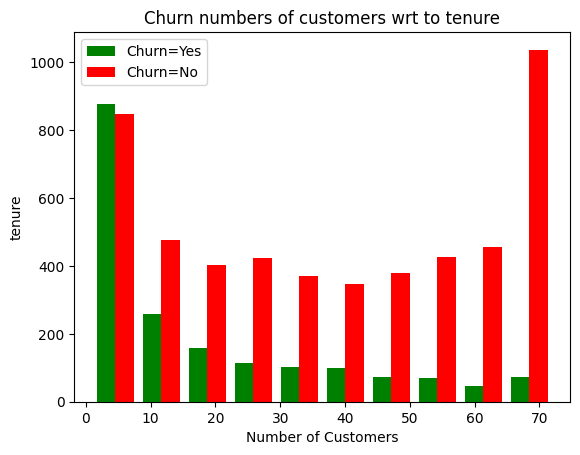

In [33]:
plt.hist([tenure_left,tenure_not_left],color=['green','red'],label=["Churn=Yes","Churn=No"])
plt.xlabel("Number of Customers")
plt.ylabel("tenure")
plt.title("Churn numbers of customers wrt to tenure")
plt.legend()

## Plot the same chart for monthly charges

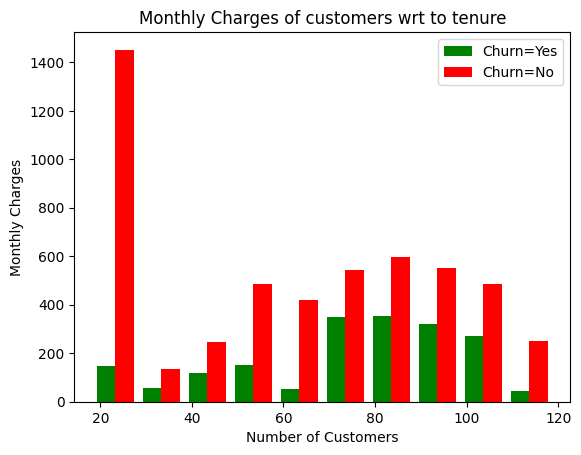

In [34]:
monthlycharge_not_left=df1[df1.Churn=="No"].MonthlyCharges
monthlycharge_left=df1[df1.Churn=="Yes"].MonthlyCharges
plt.hist([monthlycharge_left,monthlycharge_not_left],color=['green','red'],label=["Churn=Yes","Churn=No"])
plt.xlabel("Number of Customers")
plt.ylabel("Monthly Charges")
plt.title("Monthly Charges of customers wrt to tenure")
plt.legend()

## Encoding the DataSet

In [82]:
def print_unq(df):
  for col in df:
      if(df[col].dtypes=='object'):
        print(f'{col} : {df[col].unique()}')

In [83]:
print_unq(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [40]:
# Replace all the above No internet Service && No phone service and No as no or basically 0 

In [113]:
df1.replace('No internet service','No',inplace=True)

<ipython-input-113-6ec62bd94ef0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [42]:
print_unq(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [112]:
df1.replace('No phone service','No',inplace=True)

<ipython-input-112-1b1036926b6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [44]:
print_unq(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


## Now encode the text to numeric data

In [118]:
unique_vals = df1.apply(lambda x: set(x.unique()))
unique_vals

gender                                                 {Male, Female}
SeniorCitizen                                                  {0, 1}
Partner                                                        {0, 1}
Dependents                                                     {0, 1}
tenure              {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
PhoneService                                                   {0, 1}
MultipleLines                                               {No, Yes}
InternetService                                {No, DSL, Fiber optic}
OnlineSecurity                                              {No, Yes}
OnlineBackup                                                {No, Yes}
DeviceProtection                                            {No, Yes}
TechSupport                                                 {No, Yes}
StreamingTV                                                 {No, Yes}
StreamingMovies                                             {No, Yes}
Contract            

In [119]:
yes_no_cols = [col for col in df1.columns if unique_vals[col] == {'Yes', 'No'} or unique_vals[col] == {'No', 'Yes'}]
yes_no_cols

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [120]:
for col in yes_no_cols:
  df1[col].replace({"Yes":1,"No":0},inplace=True)

<ipython-input-120-bdb54a27969f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({"Yes":1,"No":0},inplace=True)


In [123]:
print_unq(df1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [122]:
df1["gender"].replace({"Male":1,"Female":0},inplace=True)

<ipython-input-122-1e41e882dd87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["gender"].replace({"Male":1,"Female":0},inplace=True)


In [127]:
df2=pd.get_dummies(data=df1,columns=["InternetService","Contract","PaymentMethod"])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [160]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [129]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

Scale the data now

In [135]:
df2.tenure.describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [136]:
df2.MonthlyCharges.describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [137]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols_to_scale=["tenure","MonthlyCharges","TotalCharges"]

df2[cols_to_scale]=scaler.fit_transform(df2[["tenure","MonthlyCharges","TotalCharges"]])

In [138]:
df2.tenure.describe()

count    7032.000000
mean        0.442560
std         0.345708
min         0.000000
25%         0.112676
50%         0.394366
75%         0.760563
max         1.000000
Name: tenure, dtype: float64

In [139]:
df2.MonthlyCharges.describe()

count    7032.000000
mean        0.463166
std         0.299363
min         0.000000
25%         0.172512
50%         0.518408
75%         0.712562
max         1.000000
Name: MonthlyCharges, dtype: float64

In [140]:
df2.TotalCharges.describe()

count    7032.000000
mean        0.261309
std         0.261571
min         0.000000
25%         0.044155
50%         0.159090
75%         0.435719
max         1.000000
Name: TotalCharges, dtype: float64

## Get to training the model

In [142]:
X=df2.drop("Churn",axis='columns')
y=df2["Churn"]

In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [144]:
X_train.shape

(5625, 26)

In [145]:
y_train.shape

(5625,)

In [146]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,0,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,1,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,0,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,1,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,0,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,1,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,0,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,1,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,1,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [151]:
model=keras.Sequential(
    [
        keras.Input(shape=(26,),),
        keras.layers.Dense(26,activation='relu'),
        # keras.layers.Dense(20,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid'),
    ]
)

optimizer=keras.optimizers.Adam(learning_rate=0.01)

model.compile(
    optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4401 - accuracy: 0.7897
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4184 - accuracy: 0.8009
Epoch 3/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4150 - accuracy: 0.8053
Epoch 4/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4130 - accuracy: 0.8073
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4103 - accuracy: 0.8076
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4072 - accuracy: 0.8101
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4033 - accuracy: 0.8085
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4037 - accuracy: 0.8160
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4025 - accuracy: 0.8103
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4005 - accura

In [152]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.5965 - accuracy: 0.7647


[0.5965344309806824, 0.764747679233551]

In [154]:
y_pred=model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [163]:
y_pred[:5]

array([[6.2522739e-02],
       [4.9763173e-01],
       [3.3838123e-09],
       [8.7312740e-01],
       [4.6503061e-01]], dtype=float32)

In [166]:
def Y_predconv(li):
  li2=[]
  for i in li:
    if i>=0.5:
      li2.append(1)
    else:
      li2.append(0)
  return li2

In [168]:
#Convert into stuff  
y_pred=Y_predconv(y_pred)

## Get done with metrics

In [170]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       999
           1       0.63      0.46      0.53       408

    accuracy                           0.76      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.75      0.76      0.75      1407



Text(95.72222222222221, 0.5, 'truth')

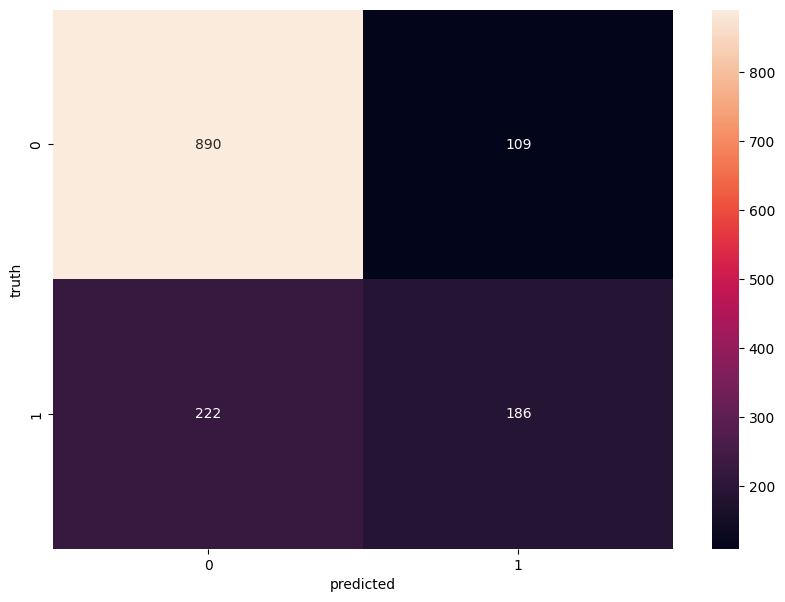

In [176]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel('truth')

## Accuracy = Correct Predictions/Total Predictions

In [180]:
acc=(890+186)/(890+109+222+186)
round(acc,4)

0.7647

## Precision of a class = number of correct predictions for a class / total predictions for a class

### Precision for zero

In [182]:
pr0=890/(890+222)
round(pr0,4)

0.8004

#### Precision for **1**

In [185]:
pr1=186/(109+186)
round(pr1,4)

0.6305